Found 22194 files belonging to 3 classes.
Found 2772 files belonging to 3 classes.
Found 2778 files belonging to 3 classes.


Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 MobilenetV3small (Functiona  (None, 3, 3, 576)        441000    
 l)                                                              
                                                                 
 global_average_pooling2d_13  (None, 576)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_13 (Dense)            (None, 3)                 1731      
                                                                 
Total params: 442,731
Trainable params: 430,619
Non-trainable params: 12,112
_________________________________________________________________
Epoch 1/100


2025-08-21 23:18:30.847593: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 103 of 1000


  4/174 [..............................] - ETA: 6s - loss: 1.2508 - accuracy: 0.4238 

2025-08-21 23:18:36.873264: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


174/174 [==============================] - 28s 55ms/step - loss: 0.5121 - accuracy: 0.7766 - val_loss: 0.2963 - val_accuracy: 0.8694
Epoch 2/100
174/174 [==============================] - 6s 33ms/step - loss: 0.2620 - accuracy: 0.8930 - val_loss: 0.2730 - val_accuracy: 0.8802
Epoch 3/100
174/174 [==============================] - 6s 33ms/step - loss: 0.2122 - accuracy: 0.9139 - val_loss: 0.1821 - val_accuracy: 0.9307
Epoch 4/100
174/174 [==============================] - 6s 33ms/step - loss: 0.1877 - accuracy: 0.9228 - val_loss: 0.1645 - val_accuracy: 0.9390
Epoch 5/100
174/174 [==============================] - 6s 33ms/step - loss: 0.1656 - accuracy: 0.9320 - val_loss: 0.1714 - val_accuracy: 0.9336
Epoch 6/100
174/174 [==============================] - 6s 33ms/step - loss: 0.1472 - accuracy: 0.9403 - val_loss: 0.1390 - val_accuracy: 0.9448
Epoch 7/100
174/174 [==============================] - 6s 33ms/step - loss: 0.1426 - accuracy: 0.9406 - val_loss: 0.1357 - val_accuracy: 0.9459
Epo

INFO:tensorflow:Assets written to: mobilenetv3_small_model/assets


INFO:tensorflow:Assets written to: mobilenetv3_small_model/assets
2025-08-21 23:21:06.628173: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2025-08-21 23:21:06.628195: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2025-08-21 23:21:06.628311: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: mobilenetv3_small_model
2025-08-21 23:21:06.646799: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2025-08-21 23:21:06.646822: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: mobilenetv3_small_model
2025-08-21 23:21:06.715987: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2025-08-21 23:21:07.232222: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: mobilenetv3_small_model
2025-08-21 23:21:07.383299: I tensorflow/cc/saved_mod

Model saved as: ./mobilenetv3_small_model_A.tflite
Model size: 605.44 KB
3/3 [==============================] - 2s 9ms/step

 Classification Report:
              precision    recall  f1-score   support

         100     0.8561    0.9243    0.8889       251
          50     0.9906    0.9840    0.9873      1500
      50-100     0.9577    0.9484    0.9530      1027

    accuracy                         0.9654      2778
   macro avg     0.9348    0.9522    0.9431      2778
weighted avg     0.9663    0.9654    0.9657      2778

Confusion Matrix:
[[ 232    0   19]
 [   0 1476   24]
 [  39   14  974]]


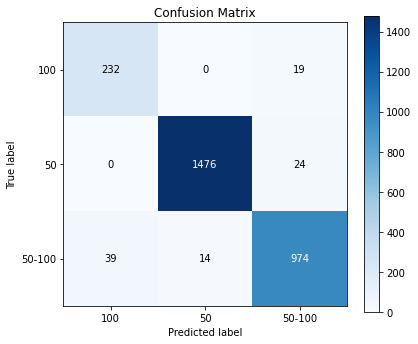

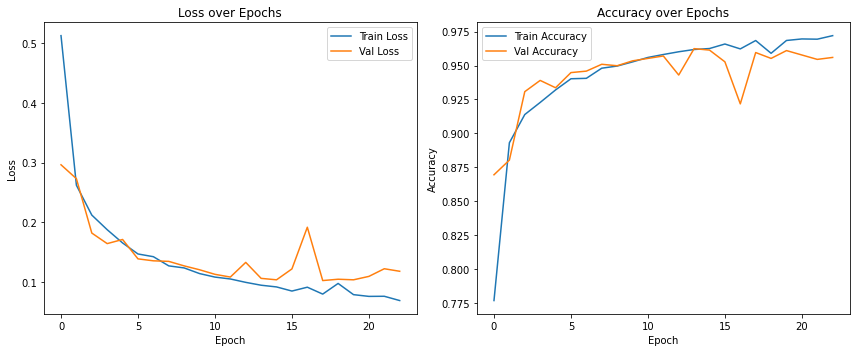

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa

# 1. Set random seed
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# 2. Define the dataset directory and parameters
output_dir = "/root/autodl-tmp/spl_data"  # This should point to the split dataset
batch_size = 128
img_height = 96
img_width = 96
class_names = ['100', '50', '50-100']
num_classes = len(class_names)

# 3. Load the train, validation, and test datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'train'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'val'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'test'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

# 4. Custom rotation function (optional for augmentation)
def random_rotate(image, max_angle=30):
    angle = tf.random.uniform([], minval=-max_angle, maxval=max_angle, dtype=tf.float32)
    radians = angle * np.pi / 180.0  # Convert to radians
    image = tfa.image.rotate(image, radians)
    return image

# 5. Data augmentation function
def data_augmentation(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    # Apply other data augmentations, like random brightness and contrast
    #image = tf.image.random_brightness(image, max_delta=0.5)
    #image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    
    return image, label



# Apply data augmentation to the training dataset
train_ds = train_ds.map(data_augmentation, num_parallel_calls=tf.data.AUTOTUNE)

# Normalize validation and test datasets
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

# Apply normalization to validation and test datasets
val_ds = val_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)

# 6. Data pipeline optimization
AUTOTUNE = tf.data.AUTOTUNE

# Cache, shuffle, and prefetch the training dataset
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)

# Cache and prefetch the validation and test datasets
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 7. Build the MobileNetV3Small Minimalistic model
base_model = tf.keras.applications.MobileNetV3Small(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights="imagenet",
    alpha=1.0,
    include_preprocessing=False,
    minimalistic=True
)

base_model.trainable = True  # Optionally freeze the base model

# Add custom classification head
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)  # Note: training=False
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Print model summary
model.summary()

# 8. Compile and train the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

history = model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[early_stopping])

# 9. Save the model
saved_model_dir = "mobilenetv3_small_model"
model.save(saved_model_dir)

# 10. TFLite conversion (optional)
def representative_dataset():
    for images, _ in train_ds.take(100):
        yield [tf.cast(images, tf.float32)]

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.float32
tflite_model = converter.convert()

tflite_model_path = "./mobilenetv3_small_model_A.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

if os.path.exists(tflite_model_path):
    print(f"Model saved as: {tflite_model_path}")
    print(f"Model size: {os.path.getsize(tflite_model_path) / 1024:.2f} KB")
else:
    print("Model save failed")

# 11. Evaluate on the test dataset
y_true, y_pred = [], []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# 12. Visualize confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm, class_names)

# 13. Visualize training process
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()


Found 22194 files belonging to 3 classes.
Found 2772 files belonging to 3 classes.
Found 2778 files belonging to 3 classes.


Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 MobilenetV3small (Functiona  (None, 3, 3, 576)        441000    
 l)                                                              
                                                                 
 global_average_pooling2d_14  (None, 576)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_14 (Dense)            (None, 3)                 1731      
                                                                 
Total params: 442,731
Trainable params: 430,619
Non-trainable params: 12,112
_________________________________________________________________
Epoch 1/100


2025-08-21 23:22:42.345341: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 95 of 1000


  2/174 [..............................] - ETA: 10s - loss: 1.3421 - accuracy: 0.3945  

2025-08-21 23:22:49.677982: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


174/174 [==============================] - 31s 62ms/step - loss: 0.5216 - accuracy: 0.7727 - val_loss: 0.3102 - val_accuracy: 0.8651
Epoch 2/100
174/174 [==============================] - 6s 34ms/step - loss: 0.2720 - accuracy: 0.8861 - val_loss: 0.2913 - val_accuracy: 0.8745
Epoch 3/100
174/174 [==============================] - 6s 34ms/step - loss: 0.2266 - accuracy: 0.9064 - val_loss: 0.1945 - val_accuracy: 0.9242
Epoch 4/100
174/174 [==============================] - 6s 33ms/step - loss: 0.1878 - accuracy: 0.9233 - val_loss: 0.1741 - val_accuracy: 0.9322
Epoch 5/100
174/174 [==============================] - 6s 34ms/step - loss: 0.1661 - accuracy: 0.9321 - val_loss: 0.1593 - val_accuracy: 0.9405
Epoch 6/100
174/174 [==============================] - 6s 34ms/step - loss: 0.1496 - accuracy: 0.9394 - val_loss: 0.1508 - val_accuracy: 0.9412
Epoch 7/100
174/174 [==============================] - 6s 34ms/step - loss: 0.1432 - accuracy: 0.9409 - val_loss: 0.1402 - val_accuracy: 0.9473
Epo

INFO:tensorflow:Assets written to: mobilenetv3_small_model/assets


INFO:tensorflow:Assets written to: mobilenetv3_small_model/assets
2025-08-21 23:25:37.375911: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2025-08-21 23:25:37.375932: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2025-08-21 23:25:37.376045: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: mobilenetv3_small_model
2025-08-21 23:25:37.392383: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2025-08-21 23:25:37.392405: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: mobilenetv3_small_model
2025-08-21 23:25:37.451155: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2025-08-21 23:25:37.935533: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: mobilenetv3_small_model
2025-08-21 23:25:38.075379: I tensorflow/cc/saved_mod

Model saved as: ./mobilenetv3_small_model_B.tflite
Model size: 605.44 KB
3/3 [==============================] - 0s 8ms/step

 Classification Report:
              precision    recall  f1-score   support

         100     0.8704    0.8566    0.8635       251
          50     0.9926    0.9827    0.9876      1500
      50-100     0.9407    0.9581    0.9493      1027

    accuracy                         0.9622      2778
   macro avg     0.9346    0.9325    0.9335      2778
weighted avg     0.9624    0.9622    0.9622      2778

Confusion Matrix:
[[ 215    0   36]
 [   0 1474   26]
 [  32   11  984]]


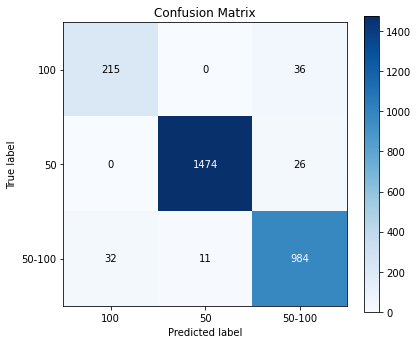

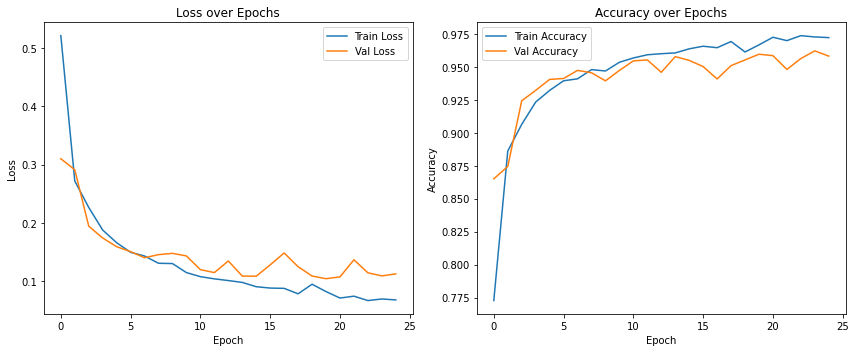

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa

# 1. Set random seed
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# 2. Define the dataset directory and parameters
output_dir = "/root/autodl-tmp/spl_data"  # This should point to the split dataset
batch_size = 128
img_height = 96
img_width = 96
class_names = ['100', '50', '50-100']
num_classes = len(class_names)

# 3. Load the train, validation, and test datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'train'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'val'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'test'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

# 4. Custom rotation function (optional for augmentation)
def random_rotate(image, max_angle=30):
    angle = tf.random.uniform([], minval=-max_angle, maxval=max_angle, dtype=tf.float32)
    radians = angle * np.pi / 180.0  # Convert to radians
    image = tfa.image.rotate(image, radians)
    return image

# 5. Data augmentation function
def data_augmentation(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    # Apply other data augmentations, like random brightness and contrast
    image = tf.image.random_brightness(image, max_delta=0.5)
    #image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    
    return image, label



# Apply data augmentation to the training dataset
train_ds = train_ds.map(data_augmentation, num_parallel_calls=tf.data.AUTOTUNE)

# Normalize validation and test datasets
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

# Apply normalization to validation and test datasets
val_ds = val_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)

# 6. Data pipeline optimization
AUTOTUNE = tf.data.AUTOTUNE

# Cache, shuffle, and prefetch the training dataset
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)

# Cache and prefetch the validation and test datasets
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 7. Build the MobileNetV3Small Minimalistic model
base_model = tf.keras.applications.MobileNetV3Small(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights="imagenet",
    alpha=1.0,
    include_preprocessing=False,
    minimalistic=True
)

base_model.trainable = True  # Optionally freeze the base model

# Add custom classification head
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)  # Note: training=False
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Print model summary
model.summary()

# 8. Compile and train the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

history = model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[early_stopping])

# 9. Save the model
saved_model_dir = "mobilenetv3_small_model"
model.save(saved_model_dir)

# 10. TFLite conversion (optional)
def representative_dataset():
    for images, _ in train_ds.take(100):
        yield [tf.cast(images, tf.float32)]

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.float32
tflite_model = converter.convert()

tflite_model_path = "./mobilenetv3_small_model_B.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

if os.path.exists(tflite_model_path):
    print(f"Model saved as: {tflite_model_path}")
    print(f"Model size: {os.path.getsize(tflite_model_path) / 1024:.2f} KB")
else:
    print("Model save failed")

# 11. Evaluate on the test dataset
y_true, y_pred = [], []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# 12. Visualize confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm, class_names)

# 13. Visualize training process
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()


Found 22194 files belonging to 3 classes.
Found 2772 files belonging to 3 classes.
Found 2778 files belonging to 3 classes.


Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_40 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 MobilenetV3small (Functiona  (None, 3, 3, 576)        441000    
 l)                                                              
                                                                 
 global_average_pooling2d_19  (None, 576)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_19 (Dense)            (None, 3)                 1731      
                                                                 
Total params: 442,731
Trainable params: 430,619
Non-trainable params: 12,112
_________________________________________________________________
Epoch 1/100


2025-08-21 23:44:15.550632: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 94 of 1000


  3/174 [..............................] - ETA: 6s - loss: 1.3023 - accuracy: 0.4062   

2025-08-21 23:44:22.092167: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


174/174 [==============================] - 28s 58ms/step - loss: 0.5184 - accuracy: 0.7734 - val_loss: 0.2940 - val_accuracy: 0.8734
Epoch 2/100
174/174 [==============================] - 6s 34ms/step - loss: 0.2667 - accuracy: 0.8901 - val_loss: 0.2365 - val_accuracy: 0.9001
Epoch 3/100
174/174 [==============================] - 6s 34ms/step - loss: 0.2161 - accuracy: 0.9119 - val_loss: 0.1851 - val_accuracy: 0.9286
Epoch 4/100
174/174 [==============================] - 6s 34ms/step - loss: 0.1891 - accuracy: 0.9215 - val_loss: 0.1663 - val_accuracy: 0.9365
Epoch 5/100
174/174 [==============================] - 6s 34ms/step - loss: 0.1639 - accuracy: 0.9317 - val_loss: 0.1573 - val_accuracy: 0.9383
Epoch 6/100
174/174 [==============================] - 6s 34ms/step - loss: 0.1455 - accuracy: 0.9412 - val_loss: 0.1567 - val_accuracy: 0.9380
Epoch 7/100
174/174 [==============================] - 6s 34ms/step - loss: 0.1485 - accuracy: 0.9389 - val_loss: 0.1413 - val_accuracy: 0.9376
Epo

INFO:tensorflow:Assets written to: mobilenetv3_small_model/assets


INFO:tensorflow:Assets written to: mobilenetv3_small_model/assets
2025-08-21 23:46:18.722928: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2025-08-21 23:46:18.722951: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2025-08-21 23:46:18.723072: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: mobilenetv3_small_model
2025-08-21 23:46:18.736964: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2025-08-21 23:46:18.736984: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: mobilenetv3_small_model
2025-08-21 23:46:18.785771: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2025-08-21 23:46:19.253989: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: mobilenetv3_small_model
2025-08-21 23:46:19.387138: I tensorflow/cc/saved_mod

Model saved as: ./mobilenetv3_small_model_C.tflite
Model size: 605.44 KB
3/3 [==============================] - 0s 8ms/step

 Classification Report:
              precision    recall  f1-score   support

         100     0.8920    0.7570    0.8190       251
          50     0.9906    0.9853    0.9880      1500
      50-100     0.9226    0.9640    0.9429      1027

    accuracy                         0.9568      2778
   macro avg     0.9351    0.9021    0.9166      2778
weighted avg     0.9566    0.9568    0.9560      2778

Confusion Matrix:
[[ 190    0   61]
 [   0 1478   22]
 [  23   14  990]]


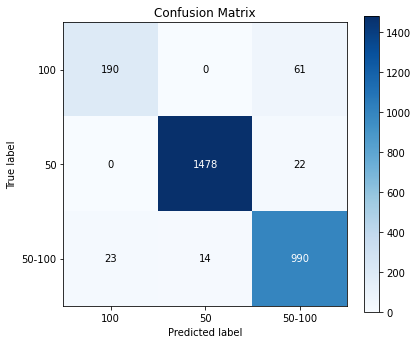

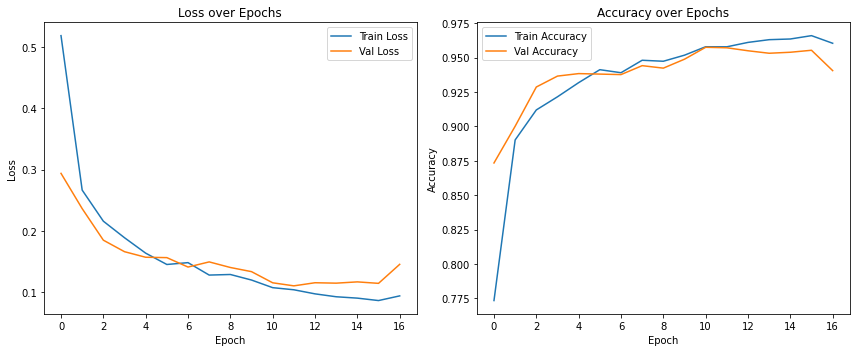

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa

# 1. Set random seed
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# 2. Define the dataset directory and parameters
output_dir = "/root/autodl-tmp/spl_data"  # This should point to the split dataset
batch_size = 128
img_height = 96
img_width = 96
class_names = ['100', '50', '50-100']
num_classes = len(class_names)

# 3. Load the train, validation, and test datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'train'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'val'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'test'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

# 4. Custom rotation function (optional for augmentation)
def random_rotate(image, max_angle=30):
    angle = tf.random.uniform([], minval=-max_angle, maxval=max_angle, dtype=tf.float32)
    radians = angle * np.pi / 180.0  # Convert to radians
    image = tfa.image.rotate(image, radians)
    return image

# 5. Data augmentation function
def data_augmentation(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    # Apply other data augmentations, like random brightness and contrast
    #image = tf.image.random_brightness(image, max_delta=0.5)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    
    return image, label


# Apply data augmentation to the training dataset
train_ds = train_ds.map(data_augmentation, num_parallel_calls=tf.data.AUTOTUNE)

# Normalize validation and test datasets
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

# Apply normalization to validation and test datasets
val_ds = val_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)

# 6. Data pipeline optimization
AUTOTUNE = tf.data.AUTOTUNE

# Cache, shuffle, and prefetch the training dataset
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)

# Cache and prefetch the validation and test datasets
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 7. Build the MobileNetV3Small Minimalistic model
base_model = tf.keras.applications.MobileNetV3Small(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights="imagenet",
    alpha=1.0,
    include_preprocessing=False,
    minimalistic=True
)

base_model.trainable = True  # Optionally freeze the base model

# Add custom classification head
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)  # Note: training=False
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Print model summary
model.summary()

# 8. Compile and train the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

history = model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[early_stopping])

# 9. Save the model
saved_model_dir = "mobilenetv3_small_model"
model.save(saved_model_dir)

# 10. TFLite conversion (optional)
def representative_dataset():
    for images, _ in train_ds.take(100):
        yield [tf.cast(images, tf.float32)]

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.float32
tflite_model = converter.convert()

tflite_model_path = "./mobilenetv3_small_model_C.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

if os.path.exists(tflite_model_path):
    print(f"Model saved as: {tflite_model_path}")
    print(f"Model size: {os.path.getsize(tflite_model_path) / 1024:.2f} KB")
else:
    print("Model save failed")

# 11. Evaluate on the test dataset
y_true, y_pred = [], []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# 12. Visualize confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm, class_names)

# 13. Visualize training process
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()


Found 22194 files belonging to 3 classes.
Found 2772 files belonging to 3 classes.
Found 2778 files belonging to 3 classes.


Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_44 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 MobilenetV3small (Functiona  (None, 3, 3, 576)        441000    
 l)                                                              
                                                                 
 global_average_pooling2d_21  (None, 576)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_21 (Dense)            (None, 3)                 1731      
                                                                 
Total params: 442,731
Trainable params: 430,619
Non-trainable params: 12,112
_________________________________________________________________
Epoch 1/100


2025-08-21 23:56:10.545391: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 95 of 1000


  5/174 [..............................] - ETA: 6s - loss: 1.1693 - accuracy: 0.4500 

2025-08-21 23:56:16.604900: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


174/174 [==============================] - 27s 53ms/step - loss: 0.5237 - accuracy: 0.7705 - val_loss: 0.3080 - val_accuracy: 0.8712
Epoch 2/100
174/174 [==============================] - 6s 33ms/step - loss: 0.2789 - accuracy: 0.8838 - val_loss: 0.2581 - val_accuracy: 0.8925
Epoch 3/100
174/174 [==============================] - 6s 33ms/step - loss: 0.2288 - accuracy: 0.9064 - val_loss: 0.2388 - val_accuracy: 0.8947
Epoch 4/100
174/174 [==============================] - 6s 34ms/step - loss: 0.1861 - accuracy: 0.9239 - val_loss: 0.1660 - val_accuracy: 0.9376
Epoch 5/100
174/174 [==============================] - 6s 33ms/step - loss: 0.1698 - accuracy: 0.9304 - val_loss: 0.1604 - val_accuracy: 0.9387
Epoch 6/100
174/174 [==============================] - 6s 33ms/step - loss: 0.1505 - accuracy: 0.9399 - val_loss: 0.1508 - val_accuracy: 0.9394
Epoch 7/100
174/174 [==============================] - 6s 33ms/step - loss: 0.1495 - accuracy: 0.9386 - val_loss: 0.1413 - val_accuracy: 0.9398
Epo

INFO:tensorflow:Assets written to: mobilenetv3_small_model/assets


INFO:tensorflow:Assets written to: mobilenetv3_small_model/assets
2025-08-21 23:59:47.307878: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2025-08-21 23:59:47.307901: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2025-08-21 23:59:47.308017: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: mobilenetv3_small_model
2025-08-21 23:59:47.324050: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2025-08-21 23:59:47.324072: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: mobilenetv3_small_model
2025-08-21 23:59:47.382103: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2025-08-21 23:59:47.871506: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: mobilenetv3_small_model
2025-08-21 23:59:48.011315: I tensorflow/cc/saved_mod

Model saved as: ./mobilenetv3_small_model_D.tflite
Model size: 605.44 KB
3/3 [==============================] - 0s 9ms/step

 Classification Report:
              precision    recall  f1-score   support

         100     0.9177    0.8446    0.8797       251
          50     0.9939    0.9853    0.9896      1500
      50-100     0.9425    0.9727    0.9574      1027

    accuracy                         0.9680      2778
   macro avg     0.9514    0.9342    0.9422      2778
weighted avg     0.9680    0.9680    0.9678      2778

Confusion Matrix:
[[ 212    0   39]
 [   0 1478   22]
 [  19    9  999]]


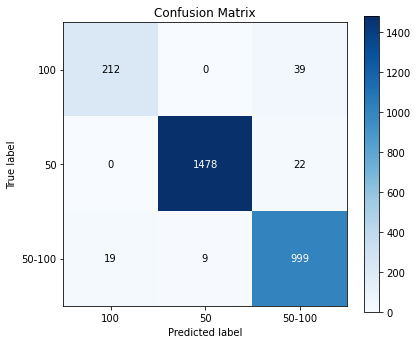

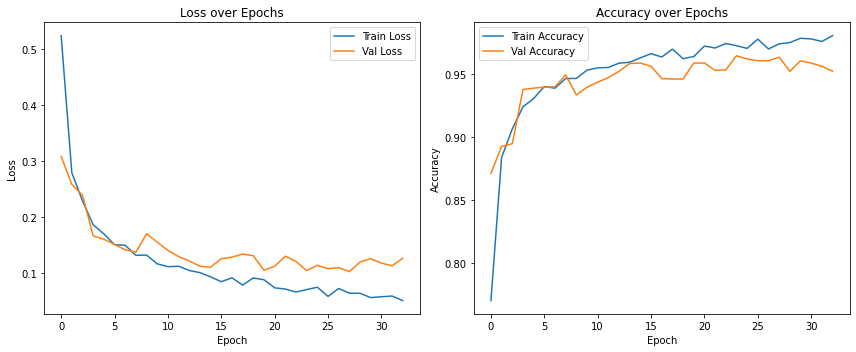

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa

# 1. Set random seed
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# 2. Define the dataset directory and parameters
output_dir = "/root/autodl-tmp/spl_data"  # This should point to the split dataset
batch_size = 128
img_height = 96
img_width = 96
class_names = ['100', '50', '50-100']
num_classes = len(class_names)

# 3. Load the train, validation, and test datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'train'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'val'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'test'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

# 4. Custom rotation function (optional for augmentation)
def random_rotate(image, max_angle=30):
    angle = tf.random.uniform([], minval=-max_angle, maxval=max_angle, dtype=tf.float32)
    radians = angle * np.pi / 180.0  # Convert to radians
    image = tfa.image.rotate(image, radians)
    return image

# 5. Data augmentation function
def data_augmentation(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    # Apply other data augmentations, like random brightness and contrast
    image = tf.image.random_brightness(image, max_delta=0.5)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    
    return image, label


# Apply data augmentation to the training dataset
train_ds = train_ds.map(data_augmentation, num_parallel_calls=tf.data.AUTOTUNE)

# Normalize validation and test datasets
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

# Apply normalization to validation and test datasets
val_ds = val_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)

# 6. Data pipeline optimization
AUTOTUNE = tf.data.AUTOTUNE

# Cache, shuffle, and prefetch the training dataset
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)

# Cache and prefetch the validation and test datasets
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 7. Build the MobileNetV3Small Minimalistic model
base_model = tf.keras.applications.MobileNetV3Small(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights="imagenet",
    alpha=1.0,
    include_preprocessing=False,
    minimalistic=True
)

base_model.trainable = True  # Optionally freeze the base model

# Add custom classification head
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)  # Note: training=False
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Print model summary
model.summary()

# 8. Compile and train the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

history = model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[early_stopping])

# 9. Save the model
saved_model_dir = "mobilenetv3_small_model"
model.save(saved_model_dir)

# 10. TFLite conversion (optional)
def representative_dataset():
    for images, _ in train_ds.take(100):
        yield [tf.cast(images, tf.float32)]

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.float32
tflite_model = converter.convert()

tflite_model_path = "./mobilenetv3_small_model_D.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

if os.path.exists(tflite_model_path):
    print(f"Model saved as: {tflite_model_path}")
    print(f"Model size: {os.path.getsize(tflite_model_path) / 1024:.2f} KB")
else:
    print("Model save failed")

# 11. Evaluate on the test dataset
y_true, y_pred = [], []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# 12. Visualize confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm, class_names)

# 13. Visualize training process
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()


In [1]:
!apt update
!apt install -y unrar


Get:1 https://repo.huaweicloud.com/ubuntu focal InRelease [265 kB]
Get:2 https://repo.huaweicloud.com/ubuntu focal-backports InRelease [128 kB]
Get:3 https://repo.huaweicloud.com/ubuntu focal-proposed InRelease [277 kB]
Get:4 https://repo.huaweicloud.com/ubuntu focal-security InRelease [128 kB]
Get:5 https://repo.huaweicloud.com/ubuntu focal-updates InRelease [128 kB]
Get:6 https://repo.huaweicloud.com/ubuntu focal/main Sources [1,079 kB]
Get:7 https://repo.huaweicloud.com/ubuntu focal/universe Sources [12.3 MB]
Get:8 https://repo.huaweicloud.com/ubuntu focal/restricted Sources [7,198 B]
Get:9 https://repo.huaweicloud.com/ubuntu focal/multiverse Sources [208 kB]
Get:10 https://repo.huaweicloud.com/ubuntu focal/restricted amd64 Packages [33.4 kB]
Get:11 https://repo.huaweicloud.com/ubuntu focal/main amd64 Packages [1,275 kB]
Get:12 https://repo.huaweicloud.com/ubuntu focal/multiverse amd64 Packages [177 kB]
Get:13 https://repo.huaweicloud.com/ubuntu focal/universe amd64 Packages [11.3 M

In [3]:
!unrar x /root/autodl-fs/data4444.rar /root/autodl-tmp/blink_dataset/



UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /root/autodl-fs/data4444.rar

Creating    /root/autodl-tmp/blink_dataset                            OK
Creating    /root/autodl-tmp/blink_dataset/50-100                     OK
Extracting  /root/autodl-tmp/blink_dataset/50-100/2022-09-26 08_04_40.183452-13961.jpg     0  OK 
Extracting  /root/autodl-tmp/blink_dataset/50-100/2022-09-26 08_04_40.190350-13962.jpg     0  OK 
Extracting  /root/autodl-tmp/blink_dataset/50-100/2022-09-26 08_04_40.197054-13963.jpg     0  OK 
Extracting  /root/autodl-tmp/blink_dataset/50-100/2022-09-26 08_04_40.203776-13964.jpg     0  OK 
Extracting  /root/autodl-tmp/blink_dataset/50-100/2022-09-26 08_04_40.210424-13965.jpg     0  OK 
Extracting  /root/autodl-tmp/blink_dataset/50-100/2022-09-26 08_04_40.217045-13966.jpg     0  OK 
Extracting  /root/autodl-tmp/blink_dataset/50-100/2022-09-26 08_04_40.223935-13967.jpg     0  OK 
Extracting  /root/autodl-tmp/blink_dataset/50-

In [5]:
pip install scikit-learn

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 11.1 MB 95.9 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 99.0 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 5.3 MB/s eta 0:00:011ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 294 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 21.3 MB/s eta 0:00:01
     |████████████████████████████████| 347 kB 76.8 MB/s eta 0:00:01
     |████████████████████████████████| 229 kB 80.4 MB/s eta 0:00:01
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install tf2onnx onnxruntime


Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 455 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 22.1 MB/s eta 0:00:01███████████████          | 9.0 MB 22.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 88.2 MB/s eta 0:00:01
     |████████████████████████████████| 16.0 MB 113.0 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 64.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.2 MB 65.0 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 83.7 MB/s eta 0:00:01
     |████████████████████████████████| 536 kB 102.7 MB/s eta 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.4
    Uninstalling protobuf-3.19.4:
      Successfully uninstalled protobuf-3.19.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflic

In [113]:
pip install tensorflow-addons


Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 612 kB 1.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install keras-flops


Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 479.6 MB 9.6 MB/s eta 0:00:0101
     |████████████████████████████████| 440 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 139.7 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 113.7 MB/s eta 0:00:01
     |████████████████████████████████| 6.6 MB 83.0 MB/s eta 0:00:01
     |████████████████████████████████| 216 kB 120.2 MB/s eta 0:00:01
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.11.0
    Uninstalling google-auth-2.11.0:
      Successfully uninstalled google-auth-2.11.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  Attempting uninstall: grpcio
    Found existing installati

# Controlled experiment

Found 22194 files belonging to 3 classes.
Found 2772 files belonging to 3 classes.
Found 2778 files belonging to 3 classes.


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 MobilenetV3small (Functiona  (None, 3, 3, 576)        441000    
 l)                                                              
                                                                 
 global_average_pooling2d_10  (None, 576)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_10 (Dense)            (None, 3)                 1731      
                                                                 
Total params: 442,731
Trainable params: 430,619
Non-trainable params: 12,112
_________________________________________________________________
Epoch 1/100


2025-08-22 07:22:57.853800: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 102 of 1000


  3/174 [..............................] - ETA: 6s - loss: 1.3238 - accuracy: 0.4010   

2025-08-22 07:23:03.347183: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


174/174 [==============================] - 28s 54ms/step - loss: 0.5124 - accuracy: 0.7765 - val_loss: 0.2951 - val_accuracy: 0.8676
Epoch 2/100
174/174 [==============================] - 6s 37ms/step - loss: 0.2628 - accuracy: 0.8915 - val_loss: 0.2569 - val_accuracy: 0.8849
Epoch 3/100
174/174 [==============================] - 6s 33ms/step - loss: 0.2120 - accuracy: 0.9141 - val_loss: 0.1830 - val_accuracy: 0.9293
Epoch 4/100
174/174 [==============================] - 5s 32ms/step - loss: 0.1867 - accuracy: 0.9242 - val_loss: 0.1628 - val_accuracy: 0.9383
Epoch 5/100
174/174 [==============================] - 6s 32ms/step - loss: 0.1636 - accuracy: 0.9324 - val_loss: 0.1617 - val_accuracy: 0.9376
Epoch 6/100
174/174 [==============================] - 6s 32ms/step - loss: 0.1452 - accuracy: 0.9416 - val_loss: 0.1374 - val_accuracy: 0.9506
Epoch 7/100
174/174 [==============================] - 6s 32ms/step - loss: 0.1443 - accuracy: 0.9397 - val_loss: 0.1371 - val_accuracy: 0.9448
Epo

INFO:tensorflow:Assets written to: mobilenetv3_small_model/assets


INFO:tensorflow:Assets written to: mobilenetv3_small_model/assets


3/3 [==============================] - 0s 7ms/step

 Classification Report:
              precision    recall  f1-score   support

         100     0.9277    0.8685    0.8971       251
          50     0.9887    0.9873    0.9880      1500
      50-100     0.9502    0.9669    0.9585      1027

    accuracy                         0.9690      2778
   macro avg     0.9555    0.9409    0.9479      2778
weighted avg     0.9689    0.9690    0.9689      2778

Confusion Matrix:
[[ 218    0   33]
 [   0 1481   19]
 [  17   17  993]]


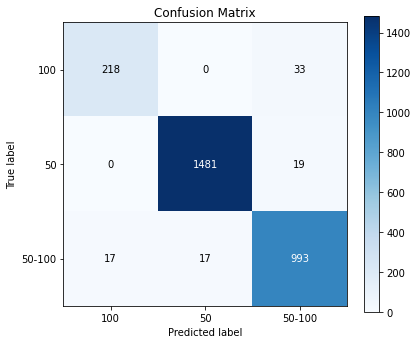

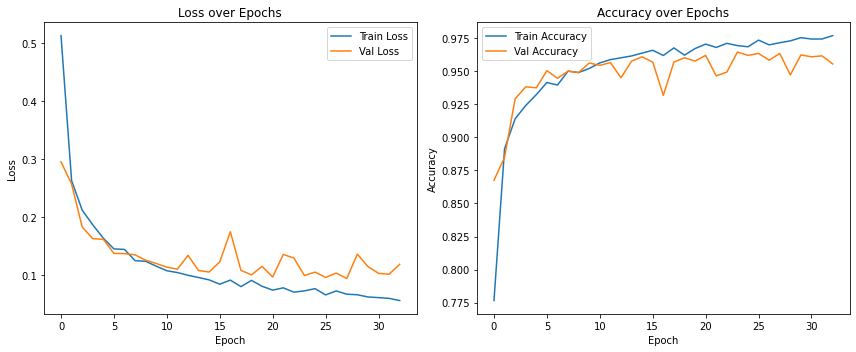

INFO:tensorflow:Assets written to: mobilenetv3_small_model/assets


INFO:tensorflow:Assets written to: mobilenetv3_small_model/assets


Model Size: 2.92 MB
1/1 [==============================] - 0s 29ms/step
Latency: 79.75 ms
Cause: Unable to locate the source code of <function Model.__call__ at 0x7ff8782f2d30>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.__call__ at 0x7ff8782f2d30>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.__call__ at 0x7ff8782f2d30>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2025-08-22 07:26:44.334959: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2025-08-22 07:26:44.335072: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2025-08-22 07:26:44.339737: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22034 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090 D, pci bus id: 0000:28:00.0, compute capability: 8.9



=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================

Doc:
scope: The nodes in the model graph are organized by their names, which is hierarchical like filesystem.
flops: Number of float operations. Note: Please read the implementation for the math behind it.

Profi

In [12]:
import tensorflow as tf
import keras_flops
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa
import time

# 1. Set random seed
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# 2. Define the dataset directory and parameters
output_dir = "/root/autodl-tmp/spl_data"  # This should point to the split dataset
batch_size = 128
img_height = 96
img_width = 96
class_names = ['100', '50', '50-100']
num_classes = len(class_names)

# 3. Load the train, validation, and test datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'train'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'val'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'test'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

# 4. Custom rotation function (optional for augmentation)
def random_rotate(image, max_angle=30):
    angle = tf.random.uniform([], minval=-max_angle, maxval=max_angle, dtype=tf.float32)
    radians = angle * np.pi / 180.0  # Convert to radians
    image = tfa.image.rotate(image, radians)
    return image

# 5. Data augmentation function
def data_augmentation(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

# Apply data augmentation to the training dataset
train_ds = train_ds.map(data_augmentation, num_parallel_calls=tf.data.AUTOTUNE)

# Normalize validation and test datasets
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

# Apply normalization to validation and test datasets
val_ds = val_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)

# 6. Data pipeline optimization
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 7. Build the MobileNetV3Small Minimalistic model
base_model = tf.keras.applications.MobileNetV3Small(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights="imagenet",
    alpha=1.0,
    include_preprocessing=False,
    minimalistic=True
)

base_model.trainable = True  # Optionally freeze the base model

# Add custom classification head
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)  # Note: training=False
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Print model summary
model.summary()

# 8. Compile and train the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

history = model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[early_stopping])

# 9. Save the model
saved_model_dir = "mobilenetv3_small_model"
model.save(saved_model_dir)

# 10. Evaluate on the test dataset
y_true, y_pred = [], []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 11. Classification report
print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# 12. Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# 13. Visualize confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm, class_names)

# 14. Visualize training process
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

# 15. Calculate Model Size (MB)
import os
model_dir = "mobilenetv3_small_model"
model.save(model_dir)
model_size = sum(os.path.getsize(os.path.join(model_dir, f)) for f in os.listdir(model_dir)) / (1024 * 1024)
print(f"Model Size: {model_size:.2f} MB")

# 16. Measure Latency (ms)
input_data = tf.random.normal((1, img_height, img_width, 3))

start_time = time.time()
model.predict(input_data)
end_time = time.time()

latency = (end_time - start_time) * 1000  # Convert to milliseconds
print(f"Latency: {latency:.2f} ms")

# 17. Directly print FLOPs (G) using keras-flops library
import keras_flops

# Calculate FLOPs directly
flops = keras_flops.get_flops(model)

# Convert FLOPs to G FLOPs (Giga FLOPs)
flops_in_g = flops / 1e9  # Convert to G FLOPs
print(f"Direct FLOPs: {flops_in_g:.2f} G")


Found 22194 files belonging to 3 classes.
Found 2772 files belonging to 3 classes.
Found 2778 files belonging to 3 classes.
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 2,227,715
Non-trainable p

2025-08-22 15:21:05.050285: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 211 of 1000
2025-08-22 15:21:10.678655: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


347/347 [==============================] - 41s 59ms/step - loss: 0.3280 - accuracy: 0.8625 - val_loss: 0.2207 - val_accuracy: 0.9080
Epoch 2/100
347/347 [==============================] - 18s 52ms/step - loss: 0.1754 - accuracy: 0.9283 - val_loss: 0.1479 - val_accuracy: 0.9387
Epoch 3/100
347/347 [==============================] - 18s 53ms/step - loss: 0.1548 - accuracy: 0.9364 - val_loss: 0.2309 - val_accuracy: 0.9030
Epoch 4/100
347/347 [==============================] - 17s 49ms/step - loss: 0.1264 - accuracy: 0.9501 - val_loss: 0.1091 - val_accuracy: 0.9585
Epoch 5/100
347/347 [==============================] - 17s 49ms/step - loss: 0.1160 - accuracy: 0.9547 - val_loss: 0.1298 - val_accuracy: 0.9416
Epoch 6/100
347/347 [==============================] - 17s 49ms/step - loss: 0.1073 - accuracy: 0.9567 - val_loss: 0.1006 - val_accuracy: 0.9585
Epoch 7/100
347/347 [==============================] - 16s 47ms/step - loss: 0.1024 - accuracy: 0.9587 - val_loss: 0.1008 - val_accuracy: 0.96

INFO:tensorflow:Assets written to: squeezenet_model/assets


INFO:tensorflow:Assets written to: squeezenet_model/assets


1/1 [==============================] - 1s 690ms/step

 Classification Report:
              precision    recall  f1-score   support

         100     0.8943    0.8765    0.8853       251
          50     0.9933    0.9860    0.9896      1500
      50-100     0.9501    0.9649    0.9575      1027

    accuracy                         0.9683      2778
   macro avg     0.9459    0.9425    0.9441      2778
weighted avg     0.9684    0.9683    0.9683      2778

Confusion Matrix:
[[ 220    0   31]
 [   0 1479   21]
 [  26   10  991]]


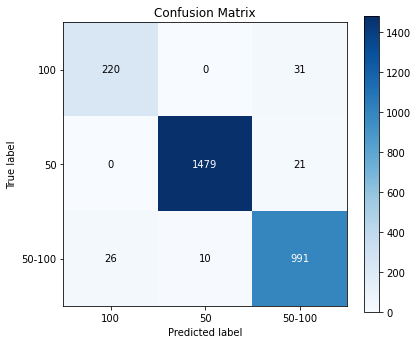

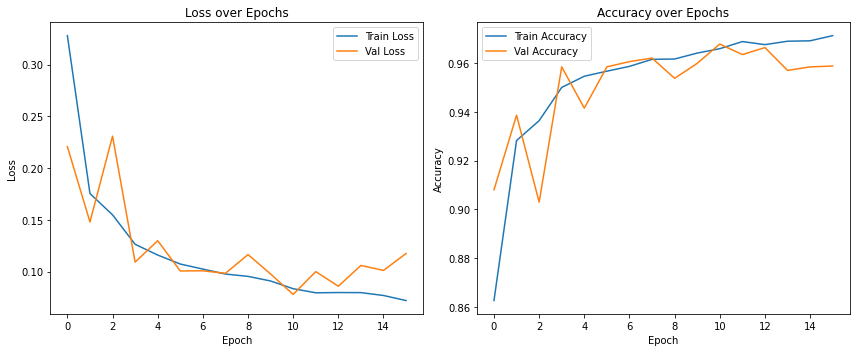

INFO:tensorflow:Assets written to: squeezenet_model/assets


INFO:tensorflow:Assets written to: squeezenet_model/assets


Model Size: 4.14 MB
1/1 [==============================] - 0s 28ms/step
Latency: 86.17 ms


In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa
import time

# 1. Set random seed
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# 2. Define the dataset directory and parameters
output_dir = "/root/autodl-tmp/spl_data"  # This should point to the split dataset
batch_size = 64
img_height = 96
img_width = 96
class_names = ['100', '50', '50-100']
num_classes = len(class_names)

# 3. Load the train, validation, and test datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'train'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'val'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'test'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

# 5. Data augmentation function
def data_augmentation(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

# Apply data augmentation to the training dataset
train_ds = train_ds.map(data_augmentation, num_parallel_calls=tf.data.AUTOTUNE)

# Normalize validation and test datasets
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

# Apply normalization to validation and test datasets
val_ds = val_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)

# 6. Data pipeline optimization
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 7. Build the SqueezeNet model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = True  # Optionally freeze the base model

# Add custom classification head
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)  # Note: training=False
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Print model summary
model.summary()

# 8. Compile and train the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

history = model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[early_stopping])

# 9. Save the model
saved_model_dir = "squeezenet_model"
model.save(saved_model_dir)

# 10. Evaluate on the test dataset
y_true, y_pred = [], []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 11. Classification report
print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# 12. Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# 13. Visualize confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm, class_names)

# 14. Visualize training process
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

# 15. Calculate Model Size (MB)
import os
model_dir = "squeezenet_model"
model.save(model_dir)
model_size = sum(os.path.getsize(os.path.join(model_dir, f)) for f in os.listdir(model_dir)) / (1024 * 1024)
print(f"Model Size: {model_size:.2f} MB")

# 16. Measure Latency (ms)
input_data = tf.random.normal((1, img_height, img_width, 3))

start_time = time.time()
model.predict(input_data)
end_time = time.time()

latency = (end_time - start_time) * 1000  # Convert to milliseconds
print(f"Latency: {latency:.2f} ms")


Found 22194 files belonging to 3 classes.
Found 2772 files belonging to 3 classes.
Found 2778 files belonging to 3 classes.
24274472/24274472 [==============================] - 6s 0us/step
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 efficientnetv2-b0 (Function  (None, 3, 3, 1280)       5919312   
 al)                                                             
                                                                 
 global_average_pooling2d_4   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 3)                 3843      
                                                                 
To

2025-08-22 15:28:54.650281: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 201 of 1000
2025-08-22 15:29:00.771576: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


347/347 [==============================] - 56s 88ms/step - loss: 0.9233 - accuracy: 0.5395 - val_loss: 0.9173 - val_accuracy: 0.5404
Epoch 2/100
347/347 [==============================] - 25s 72ms/step - loss: 0.8692 - accuracy: 0.5816 - val_loss: 0.6458 - val_accuracy: 0.7229
Epoch 3/100
347/347 [==============================] - 25s 73ms/step - loss: 0.5319 - accuracy: 0.7771 - val_loss: 0.4403 - val_accuracy: 0.8323
Epoch 4/100
347/347 [==============================] - 26s 74ms/step - loss: 0.3382 - accuracy: 0.8655 - val_loss: 0.2634 - val_accuracy: 0.8950
Epoch 5/100
347/347 [==============================] - 27s 78ms/step - loss: 0.2525 - accuracy: 0.8952 - val_loss: 0.2262 - val_accuracy: 0.9055
Epoch 6/100
347/347 [==============================] - 27s 78ms/step - loss: 0.2180 - accuracy: 0.9121 - val_loss: 0.2056 - val_accuracy: 0.9127
Epoch 7/100
347/347 [==============================] - 26s 76ms/step - loss: 0.1933 - accuracy: 0.9198 - val_loss: 0.1679 - val_accuracy: 0.93

INFO:tensorflow:Assets written to: efficientnetv2_model/assets


INFO:tensorflow:Assets written to: efficientnetv2_model/assets


1/1 [==============================] - 2s 2s/step

 Classification Report:
              precision    recall  f1-score   support

         100     0.8308    0.8606    0.8454       251
          50     0.9866    0.9820    0.9843      1500
      50-100     0.9395    0.9377    0.9386      1027

    accuracy                         0.9546      2778
   macro avg     0.9190    0.9267    0.9228      2778
weighted avg     0.9551    0.9546    0.9549      2778

Confusion Matrix:
[[ 216    0   35]
 [   0 1473   27]
 [  44   20  963]]


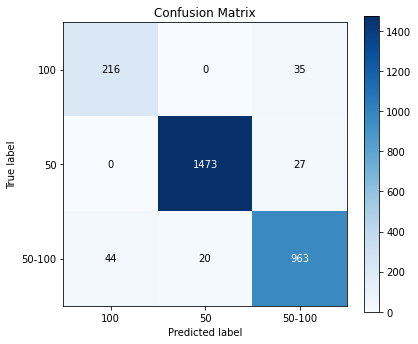

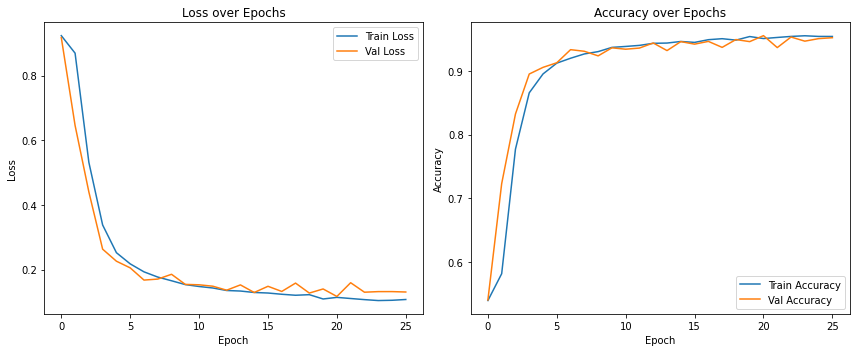

INFO:tensorflow:Assets written to: efficientnetv2_model/assets


INFO:tensorflow:Assets written to: efficientnetv2_model/assets


Model Size: 7.56 MB
1/1 [==============================] - 0s 140ms/step
Latency: 220.24 ms


In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa
import time

# 1. Set random seed
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# 2. Define the dataset directory and parameters
output_dir = "/root/autodl-tmp/spl_data"  # This should point to the split dataset
batch_size = 64
img_height = 96
img_width = 96
class_names = ['100', '50', '50-100']
num_classes = len(class_names)

# 3. Load the train, validation, and test datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'train'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'val'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'test'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

# 5. Data augmentation function
def data_augmentation(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

# Apply data augmentation to the training dataset
train_ds = train_ds.map(data_augmentation, num_parallel_calls=tf.data.AUTOTUNE)

# Normalize validation and test datasets
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

# Apply normalization to validation and test datasets
val_ds = val_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)

# 6. Data pipeline optimization
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 7. Build the EfficientNetV2B0 model
base_model = tf.keras.applications.EfficientNetV2B0(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = True  # Optionally freeze the base model

# Add custom classification head
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)  # Note: training=False
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Print model summary
model.summary()

# 8. Compile and train the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

history = model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[early_stopping])

# 9. Save the model
saved_model_dir = "efficientnetv2_model"
model.save(saved_model_dir)

# 10. Evaluate on the test dataset
y_true, y_pred = [], []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 11. Classification report
print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# 12. Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# 13. Visualize confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm, class_names)

# 14. Visualize training process
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

# 15. Calculate Model Size (MB)
import os
model_dir = "efficientnetv2_model"
model.save(model_dir)
model_size = sum(os.path.getsize(os.path.join(model_dir, f)) for f in os.listdir(model_dir)) / (1024 * 1024)
print(f"Model Size: {model_size:.2f} MB")

# 16. Measure Latency (ms)
input_data = tf.random.normal((1, img_height, img_width, 3))

start_time = time.time()
model.predict(input_data)
end_time = time.time()

latency = (end_time - start_time) * 1000  # Convert to milliseconds
print(f"Latency: {latency:.2f} ms")


Found 22194 files belonging to 3 classes.
Found 2772 files belonging to 3 classes.
Found 2778 files belonging to 3 classes.
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 global_average_pooling2d_6   (None, 1056)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 3)                 3171      
                                                                 
Total params: 4,272,887
Trainable params: 4,236,149
Non-trainable params: 36,738
____________________________________________________

2025-08-22 16:10:00.151291: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 48 of 1000
2025-08-22 16:10:10.952811: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 111 of 1000
2025-08-22 16:10:19.062445: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


174/174 [==============================] - 145s 582ms/step - loss: 0.2350 - accuracy: 0.9018 - val_loss: 0.1260 - val_accuracy: 0.9488
Epoch 2/100
174/174 [==============================] - 96s 551ms/step - loss: 0.1262 - accuracy: 0.9479 - val_loss: 0.1170 - val_accuracy: 0.9531
Epoch 3/100
174/174 [==============================] - 87s 501ms/step - loss: 0.1032 - accuracy: 0.9589 - val_loss: 0.1061 - val_accuracy: 0.9600
Epoch 4/100
174/174 [==============================] - 89s 510ms/step - loss: 0.0941 - accuracy: 0.9624 - val_loss: 0.0928 - val_accuracy: 0.9665
Epoch 5/100
174/174 [==============================] - 87s 502ms/step - loss: 0.0841 - accuracy: 0.9660 - val_loss: 0.0951 - val_accuracy: 0.9628
Epoch 6/100
174/174 [==============================] - 89s 510ms/step - loss: 0.0791 - accuracy: 0.9690 - val_loss: 0.0798 - val_accuracy: 0.9661
Epoch 7/100
174/174 [==============================] - 88s 506ms/step - loss: 0.0657 - accuracy: 0.9736 - val_loss: 0.0838 - val_accura

INFO:tensorflow:Assets written to: nasnetmobile_model/assets


INFO:tensorflow:Assets written to: nasnetmobile_model/assets


3/3 [==============================] - 4s 81ms/step

 Classification Report:
              precision    recall  f1-score   support

         100     0.9325    0.8805    0.9057       251
          50     0.9953    0.9827    0.9889      1500
      50-100     0.9472    0.9776    0.9621      1027

    accuracy                         0.9716      2778
   macro avg     0.9583    0.9469    0.9523      2778
weighted avg     0.9718    0.9716    0.9715      2778

Confusion Matrix:
[[ 221    0   30]
 [   0 1474   26]
 [  16    7 1004]]


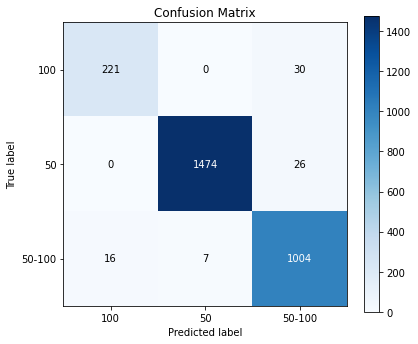

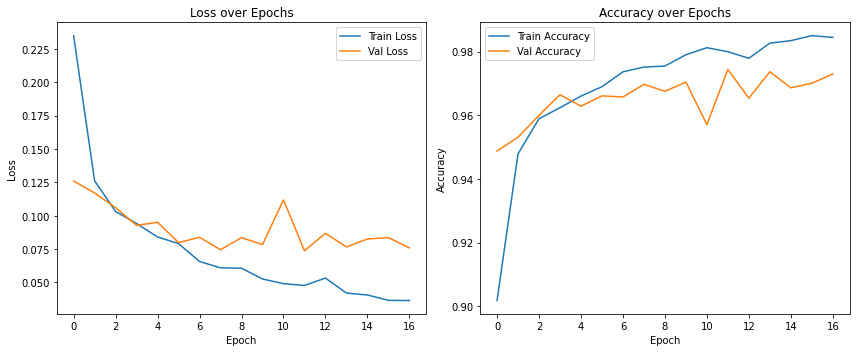

INFO:tensorflow:Assets written to: nasnetmobile_model/assets


INFO:tensorflow:Assets written to: nasnetmobile_model/assets


Model Size: 20.55 MB
1/1 [==============================] - 0s 128ms/step
Latency: 242.38 ms


In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa
import time

# 1. Set random seed
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# 2. Define the dataset directory and parameters
output_dir = "/root/autodl-tmp/spl_data"  # This should point to the split dataset
batch_size = 128
img_height = 224
img_width = 224
class_names = ['100', '50', '50-100']
num_classes = len(class_names)

# 3. Load the train, validation, and test datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'train'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'val'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'test'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

# 5. Data augmentation function
def data_augmentation(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

# Apply data augmentation to the training dataset
train_ds = train_ds.map(data_augmentation, num_parallel_calls=tf.data.AUTOTUNE)

# Normalize validation and test datasets
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

# Apply normalization to validation and test datasets
val_ds = val_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)

# 6. Data pipeline optimization
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 7. Build the NASNetMobile model
base_model = tf.keras.applications.NASNetMobile(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = True  # Optionally freeze the base model

# Add custom classification head
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)  # Note: training=False
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Print model summary
model.summary()

# 8. Compile and train the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

history = model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[early_stopping])

# 9. Save the model
saved_model_dir = "nasnetmobile_model"
model.save(saved_model_dir)

# 10. Evaluate on the test dataset
y_true, y_pred = [], []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 11. Classification report
print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# 12. Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# 13. Visualize confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm, class_names)

# 14. Visualize training process
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

# 15. Calculate Model Size (MB)
import os
model_dir = "nasnetmobile_model"
model.save(model_dir)
model_size = sum(os.path.getsize(os.path.join(model_dir, f)) for f in os.listdir(model_dir)) / (1024 * 1024)
print(f"Model Size: {model_size:.2f} MB")

# 16. Measure Latency (ms)
input_data = tf.random.normal((1, img_height, img_width, 3))

start_time = time.time()
model.predict(input_data)
end_time = time.time()

latency = (end_time - start_time) * 1000  # Convert to milliseconds
print(f"Latency: {latency:.2f} ms")


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa
import time

# 1. Set random seed
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# 2. Define the dataset directory and parameters
output_dir = "/root/autodl-tmp/spl_data"  # This should point to the split dataset
batch_size = 64
img_height = 96
img_width = 96
class_names = ['100', '50', '50-100']
num_classes = len(class_names)

# 3. Load the train, validation, and test datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'train'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'val'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(output_dir, 'test'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    class_names=class_names,
    seed=seed
)

# 5. Data augmentation function
def data_augmentation(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

# Apply data augmentation to the training dataset
train_ds = train_ds.map(data_augmentation, num_parallel_calls=tf.data.AUTOTUNE)

# Normalize validation and test datasets
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

# Apply normalization to validation and test datasets
val_ds = val_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)

# 6. Data pipeline optimization
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 7. Build the InceptionV3 model
base_model = tf.keras.applications.InceptionV3(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = True  # Optionally freeze the base model

# Add custom classification head
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)  # Note: training=False
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Print model summary
model.summary()

# 8. Compile and train the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

history = model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[early_stopping])

# 9. Save the model
saved_model_dir = "inceptionv3_model"
model.save(saved_model_dir)

# 10. Evaluate on the test dataset
y_true, y_pred = [], []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 11. Classification report
print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# 12. Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# 13. Visualize confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm, class_names)

# 14. Visualize training process
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

# 15. Calculate Model Size (MB)
import os
model_dir = "inceptionv3_model"
model.save(model_dir)
model_size = sum(os.path.getsize(os.path.join(model_dir, f)) for f in os.listdir(model_dir)) / (1024 * 1024)
print(f"Model Size: {model_size:.2f} MB")

# 16. Measure Latency (ms)
input_data = tf.random.normal((1, img_height, img_width, 3))

start_time = time.time()
model.predict(input_data)
end_time = time.time()

latency = (end_time - start_time) * 1000  # Convert to milliseconds
print(f"Latency: {latency:.2f} ms")


Found 22194 files belonging to 3 classes.
Found 2772 files belonging to 3 classes.
Found 2778 files belonging to 3 classes.
87910968/87910968 [==============================] - 8s 0us/step
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d_7   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 21,808,931
Trainable params: 21,774,499
Non-trainable 

2025-08-22 16:46:04.051305: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 216 of 1000
2025-08-22 16:46:09.179533: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


347/347 [==============================] - 51s 87ms/step - loss: 0.2791 - accuracy: 0.8845 - val_loss: 0.1819 - val_accuracy: 0.9235
Epoch 2/100
347/347 [==============================] - 25s 71ms/step - loss: 0.1644 - accuracy: 0.9325 - val_loss: 0.1468 - val_accuracy: 0.9466
Epoch 3/100
347/347 [==============================] - 25s 72ms/step - loss: 0.1324 - accuracy: 0.9472 - val_loss: 0.2117 - val_accuracy: 0.9159
Epoch 4/100
347/347 [==============================] - 23s 66ms/step - loss: 0.1129 - accuracy: 0.9549 - val_loss: 0.1127 - val_accuracy: 0.9502
Epoch 5/100
347/347 [==============================] - 24s 68ms/step - loss: 0.1003 - accuracy: 0.9604 - val_loss: 0.1511 - val_accuracy: 0.9358
Epoch 6/100
347/347 [==============================] - 24s 70ms/step - loss: 0.1022 - accuracy: 0.9588 - val_loss: 0.1046 - val_accuracy: 0.9650
Epoch 7/100
347/347 [==============================] - 22s 63ms/step - loss: 0.0924 - accuracy: 0.9614 - val_loss: 0.0948 - val_accuracy: 0.96

In [3]:
pip install tensorflow_addons

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 612 kB 3.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install scikit-learn


Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 11.1 MB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 4.6 MB/s eta 0:00:011
     |████████████████████████████████| 301 kB 97.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torchmetrics


Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 23.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras-flops


Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 479.6 MB 43.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 143.6 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 151.2 MB/s eta 0:00:01
     |████████████████████████████████| 440 kB 155.3 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 156.7 MB/s eta 0:00:01
     |████████████████████████████████| 6.6 MB 156.9 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 80.3 MB/s eta 0:00:01
     |████████████████████████████████| 216 kB 148.9 MB/s eta 0:00:01
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.11.0
    Uninstalling google-auth-2.11.0:
      Successfully uninstalled google-auth-2.11.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-